# Identify Fraud from Enron Email
In this project, you will play detective, and put your machine learning skills to use by building an algorithm to identify Enron Employees who may have committed fraud based on the public Enron financial and email dataset.

## Section 1
* Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]

Enron Corporation was an American energy, commodities, and services company based in Houston, Texas. [https://en.wikipedia.org/wiki/Enron] Enron employed approximately 20,000 staff and was one of the world's major electricity, natural gas, communications and pulp and paper companies, with claimed revenues of nearly $101 billion during 2000. At the end of 2001, it was revealed that its reported financial condition was sustained by institutionalized, systematic, and creatively planned accounting fraud, known since as the Enron scandal. Enron has since become a well-known example of willful corporate fraud and corruption.

The goal of this project is to identify persons of interest (poi), which consist of:
* Indicted persons
* Reached a settlement or plea deal with the government
* Testified in exchange for prosecution immunity

Machine learning is an advance tool for classification tasks such as the Enron project. We can recognize patterns and regularities in our data and then make predictions or decisions, through the building of models from the sample inputs.

### Enron dataset cleaning and EDA

In [1]:
import sys
import pickle
sys.path.append("./tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi',
                 'bonus',
                 'deferral_payments',
                 'deferred_income',
                 'director_fees',
                 'exercised_stock_options',
                 'expenses',
                 'from_messages',
                 'from_poi_to_this_person',
                 'from_this_person_to_poi',
                 'loan_advances',
                 'long_term_incentive',
                 'other',
                 'restricted_stock',
                 'restricted_stock_deferred',
                 'salary',
                 'shared_receipt_with_poi',
                 'to_messages',
                 'total_payments',
                 'total_stock_value',
                 'fraction_from_poi',
                 'fraction_to_poi']

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

/Users/perseas/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Investigate dataset
Load data into a pandas dataframe for easier exploration.

In [2]:
import pandas as pd

enron_df = pd.DataFrame.from_dict(data_dict, orient='index')
print(enron_df.shape)
print(enron_df.dtypes)
enron_df.head(n=10)

(146, 21)
salary                       object
to_messages                  object
deferral_payments            object
total_payments               object
loan_advances                object
bonus                        object
email_address                object
restricted_stock_deferred    object
deferred_income              object
total_stock_value            object
expenses                     object
from_poi_to_this_person      object
exercised_stock_options      object
from_messages                object
other                        object
from_this_person_to_poi      object
poi                            bool
long_term_incentive          object
shared_receipt_with_poi      object
restricted_stock             object
director_fees                object
dtype: object


,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
ALLEN PHILLIP K,201955,2902,2869717,4484442,NaN,4175000,phillip.allen@enron.com,-126027,-3081055,1729541,...,47,1729541,2195,152,65,False,304805,1407,126027,NaN
BADUM JAMES P,NaN,NaN,178980,182466,NaN,NaN,NaN,NaN,NaN,257817,...,NaN,257817,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,NaN,NaN,james.bannantine@enron.com,-560222,-5104,5243487,...,39,4046157,29,864523,0,False,NaN,465,1757552,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,frank.bay@enron.com,-82782,-201641,63014,...,NaN,NaN,NaN,69,NaN,False,NaN,NaN,145796,NaN
BAZELIDES PHILIP J,80818,NaN,684694,860136,NaN,NaN,NaN,NaN,NaN,1599641,...,NaN,1599641,NaN,874,NaN,False,93750,NaN,NaN,NaN
BECK SALLY W,231330,7315,NaN,969068,NaN,700000,sally.beck@enron.com,NaN,NaN,126027,...,144,NaN,4343,566,386,False,NaN,2639,126027,NaN
BELDEN TIMOTHY N,213999,7991,2144013,5501630,NaN,5249999,tim.belden@enron.com,NaN,-2334434,1110705,...,228,953136,484,210698,108,True,NaN,5521,157569,NaN
BELFER ROBERT,NaN,NaN,-102500,102500,NaN,NaN,NaN,44093,NaN,-44093,...,NaN,3285,NaN,NaN,NaN,False,NaN,NaN,NaN,3285
BERBERIAN DAVID,216582,NaN,NaN,228474,NaN,NaN,david.berberian@enron.com,NaN,NaN,2493616,...,NaN,1624396,NaN,NaN,NaN,False,NaN,NaN,869220,NaN


### Reformat 'NaN' to numpy nan
There are many 'NaN' values which should be reformated to numpy nan and then check again the data types of the Enron dataset.

In [3]:
import numpy as np

# Convert NaN to numpy nan
enron_df.replace(to_replace='NaN', value=np.nan, inplace=True)

print("The sum of the nan values: \n{}".format(enron_df.isnull().sum()))
enron_df.dtypes

The sum of the nan values: 
salary                        51
to_messages                   60
deferral_payments            107
total_payments                21
loan_advances                142
bonus                         64
email_address                 35
restricted_stock_deferred    128
deferred_income               97
total_stock_value             20
expenses                      51
from_poi_to_this_person       60
exercised_stock_options       44
from_messages                 60
other                         53
from_this_person_to_poi       60
poi                            0
long_term_incentive           80
shared_receipt_with_poi       60
restricted_stock              36
director_fees                129
dtype: int64


salary                       float64
to_messages                  float64
deferral_payments            float64
total_payments               float64
loan_advances                float64
bonus                        float64
email_address                 object
restricted_stock_deferred    float64
deferred_income              float64
total_stock_value            float64
expenses                     float64
from_poi_to_this_person      float64
exercised_stock_options      float64
from_messages                float64
other                        float64
from_this_person_to_poi      float64
poi                             bool
long_term_incentive          float64
shared_receipt_with_poi      float64
restricted_stock             float64
director_fees                float64
dtype: object

The missing values of the financial features are considered zero values and will be replaced later with 0s. As it was noted in the post:

https://discussions.udacity.com/t/how-to-start-the-final-project/177617/6

the financial feature values were extracted from the "enron61702insiderpay.pdf" document. Cells in the table marked as "-" are parsed as NaN values in the saved data dictionary, but actually represent values of 0. The conversion of NaNs to 0s is performed when the data is converted from a dictionary to a matrix through the featureFormat() function.

However, same does not apply for the email features. Missing values are probably reflective of a true lack of information about the person in the email corpus. Thus, considerations on treatment of email features based on missing values should be different than the treatment of financial features. For the simplicity of the project I will leave them as it is.

### Identify the higher salary
The bigger salary is the 'TOTAL', which is the sum of all the salaries of the listed Enron employees, so it is definetely an outlier and it will be removed.

In [4]:
print(enron_df['salary'].idxmax(), enron_df['salary'].max())

TOTAL 26704229.0


### POIs

In [5]:
total = enron_df['poi'].count()
pois = enron_df[enron_df['poi'] == True]['poi'].count()
print("POIs: ", pois)
print("Non POIs: ", total - pois)

POIs:  18
Non POIs:  128


### Enron employees exploration

In [6]:
enron_df.index.values

array(['ALLEN PHILLIP K', 'BADUM JAMES P', 'BANNANTINE JAMES M',
       'BAXTER JOHN C', 'BAY FRANKLIN R', 'BAZELIDES PHILIP J',
       'BECK SALLY W', 'BELDEN TIMOTHY N', 'BELFER ROBERT',
       'BERBERIAN DAVID', 'BERGSIEKER RICHARD P', 'BHATNAGAR SANJAY',
       'BIBI PHILIPPE A', 'BLACHMAN JEREMY M', 'BLAKE JR. NORMAN P',
       'BOWEN JR RAYMOND M', 'BROWN MICHAEL', 'BUCHANAN HAROLD G',
       'BUTTS ROBERT H', 'BUY RICHARD B', 'CALGER CHRISTOPHER F',
       'CARTER REBECCA C', 'CAUSEY RICHARD A', 'CHAN RONNIE',
       'CHRISTODOULOU DIOMEDES', 'CLINE KENNETH W', 'COLWELL WESLEY',
       'CORDES WILLIAM R', 'COX DAVID', 'CUMBERLAND MICHAEL S',
       'DEFFNER JOSEPH M', 'DELAINEY DAVID W', 'DERRICK JR. JAMES V',
       'DETMERING TIMOTHY J', 'DIETRICH JANET R', 'DIMICHELE RICHARD G',
       'DODSON KEITH', 'DONAHUE JR JEFFREY M', 'DUNCAN JOHN H',
       'DURAN WILLIAM D', 'ECHOLS JOHN B', 'ELLIOTT STEVEN',
       'FALLON JAMES B', 'FASTOW ANDREW S', 'FITZGERALD JAY L',
       'FOW

### Remove outliers
The higher salary of 'TOTAL', as well as 'THE TRAVEL AGENCY IN THE PARK', which was revealed from the previous exploration of the list of Enron Employees will be removed, since they don't belong to real persons. The graphical representation of bonus vs salary depicts some really high values but not unreasonable to pop them out.

Populating the interactive namespace from numpy and matplotlib


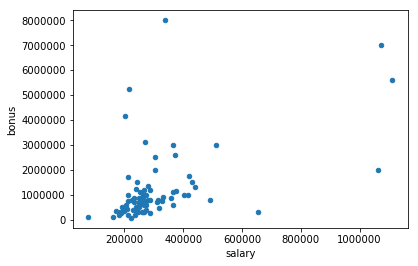

In [7]:
%pylab inline

enron_df.drop(['TOTAL', 'THE TRAVEL AGENCY IN THE PARK'], inplace=True)
enron_df.plot.scatter(x = 'salary', y = 'bonus')

### Remove outliers from data_dict

In [8]:
### Task 2: Remove outliers
data_dict.pop('TOTAL')
data_dict.pop('THE TRAVEL AGENCY IN THE PARK')

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}


### Visualise the data
Visualising the data will help to understand our data and find any other outliers. There is a nice representation of the Enron data in the following link:

https://public.tableau.com/profile/diego2420#!/vizhome/Udacity/UdacityDashboard

This dashboard was made by Diego using Tableau and was posted in the Udacity Discussions Forum:

https://discussions.udacity.com/t/enron-data-set-visualization/33340

### Enron dataset conclusions
It appears that:
* There are 21 features
    * 1 "poi" (person of interest) feature
    * 6 email features
    * 14 financial features
* There are 146 Enron employees
    * 128 non POIs
    * 18 POIs
* All the features have missing 'NaN' values except from 'poi' which is a boolean.
* Exploring the data, it was found two features, 'TOTAL' and 'THE TRAVEL AGENCY IN THE PARK', which are not persons and was removed.
* Some extreme values which belong to persons are not considered outliers and will help the algorithms to identify pois.
* The dataset will be susceptible to overfitting as it contains too many features and few data. In the following steps, we will try to apply various techniques to overcome this problem, such as:
    * Feature removal
    * Feature selection
    * Cross-validation

Missing values, i.e. 'NaN' strings will be replaced later with 0.0 using the featureFormat() function.

## Section 2
* What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “intelligently select features”, “properly scale features”]

### Create new features 
The number of sent/received emails to/from POIs is an interesting feature to be engineered and investigated. A better robust approach is actually the fraction of these emails to all emails than the absolute number of "poi emails":
1. fraction_to_poi
2. fraction_from_poi

In [9]:
### Task 3: Create new feature(s)
# Create a function that computes either quantity
def computeFraction( poi_messages, all_messages ):
    ### take care of "NaN" when there is no known email address (and so
    ### no filled email features), and integer division.
    ### in case of poi_messages or all_messages having "NaN" value, return 0.
    fraction = 0
    if poi_messages == "NaN" or all_messages == "NaN":
        return fraction
    else:
        fraction = float(poi_messages)/float(all_messages)
        
    return fraction

for name in data_dict:

    data_point = data_dict[name]

    from_poi_to_this_person = data_point["from_poi_to_this_person"]
    to_messages = data_point["to_messages"]
    fraction_from_poi = computeFraction( from_poi_to_this_person, to_messages )
    data_point["fraction_from_poi"] = fraction_from_poi

    from_this_person_to_poi = data_point["from_this_person_to_poi"]
    from_messages = data_point["from_messages"]
    fraction_to_poi = computeFraction( from_this_person_to_poi, from_messages )
    data_point["fraction_to_poi"] = fraction_to_poi

### Select features
SelectKBest was used as a univariate feature selection which works by selecting the best features based on univariate statistical tests. SelectKBest removes all but the k highest scoring features.

In [10]:
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

from sklearn.feature_selection import SelectKBest

select = SelectKBest(k=10)
select.fit(features, labels)
scores = select.scores_
# Show the scores in a table
feature_scores = zip(features_list[1:], scores)
ordered_feature_scores = sorted(feature_scores, key=lambda x: x[1], reverse=True)
for feature, score in ordered_feature_scores:
    print(feature, score)

exercised_stock_options 24.8150797332
total_stock_value 24.1828986786
bonus 20.7922520472
salary 18.2896840434
fraction_to_poi 16.409712548
deferred_income 11.4584765793
long_term_incentive 9.92218601319
restricted_stock 9.21281062198
total_payments 8.77277773009
shared_receipt_with_poi 8.58942073168
loan_advances 7.18405565829
expenses 6.09417331064
from_poi_to_this_person 5.24344971337
other 4.187477507
fraction_from_poi 3.12809174816
from_this_person_to_poi 2.38261210823
director_fees 2.12632780201
to_messages 1.64634112944
deferral_payments 0.224611274736
from_messages 0.169700947622
restricted_stock_deferred 0.0654996529099


The table above shows all the features with their respective scores. The engineered feature "fraction_to_poi" is one of the most important features taking the fifth place, behind the "exercised_stock_options", "total_stock_value", "bonus" and "salary".

### Scale features
The next essential preprocessing step after feature engineering and feature selection is to scale all the features applying the "MinMaxScaler" method. Since the range of values of our data varies widely (several orders of magnitude), the machine learning algorithm functions will not work properly without normalization. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately.

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = scaler.fit_transform(features)

## Section 3-6
* What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”]
* What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric items: “discuss parameter tuning”, “tune the algorithm”]
* What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric items: “discuss validation”, “validation strategy”]
* Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]

### Test algorithms
After creating new features, selecting the best features and scaling them, the next natural step is to run the algorithms to see how they perform after these preprocess operations. A useful scikit-learn tool, "Pipeline", packages the transformation steps of these operations with the estimation step of an algorithm classifier into a coherent workflow. The reasons to use "Pipeline" instead of keeping the steps separate are [https://www.civisanalytics.com/blog/workflows-in-python-using-pipeline-and-gridsearchcv-for-more-compact-and-comprehensive-code/]:

1. It makes code more readable (or, if you like, it makes the intent of the code clearer).
2. We don’t have to worry about keeping track data during intermediate steps, for example between transforming and estimating.
3. It makes it trivial to move ordering of the pipeline pieces, or to swap pieces in and out.
4. It allows you to do GridSearchCV on your workflow.

### Tune the algorithms
Tuning an algorithm is a process in which we optimize the parameters that impact the model in order to enable the algorithm to perform with an improved performance. If we don't tune the algorithms well, performance will be poor with low accuracy, precision or reacall. To make it more concrete, for example in the KNN algorithm, we must specify the number of K's in our model (or centroids), that are used. To find the number which gives the best performance of KNN, we have to try several different values of K for a model.

Trying lots of values for each of these free parameters is tedious, and there can sometimes be interactions between the choices we make in one step and the optimal value for a downstream step. Hopefully, there are two simple and easy tuning strategies, grid search and random search. Scikit-learn provides these two methods for algorithm parameter tuning. GridSearchCV allows us to construct a grid of all the combinations of parameters passing one classifier to pipeline each time, tries each combination, and then reports back the best combination. So, instead of trying numerous values for each tuning parameter, GridSearchCV will apply all the combinations of parameters - not just vary them independently - avoiding local optima.

To summarize, the power of GridSearchCV is that it multiplies out all the combinations of parameters and tries each one, making a k-fold cross-validated model for each combination. Then, we can ask for predictions and parameters from our GridSearchCV object and it will automatically return to us the best set of predictions, as well as the best parameters.

The following algoriths were studied:
* Naive Bayes
* Support Vector Machines
* Decision Trees
* K Nearest Neighbors
* Random Forest
* AdaBoost

### Validate analysis
The process of measuring the effectiveness of an algorithm for every possible input or how well it is fit and it generalizes to new data is called validation. A common mistake is to train and test the algorithm on the same data, which results to over-fitting, i.e. algorithm performs great on the training dataset, but it suffers on new data. To overcome this, data are separated into training and testing tests. In our analysis two validation steps applied through pipeline:
1. Data was separated into 70% training and 30% testing sets.
2. Because of the small size of the Enron dataset, stratified shuffle split method was used, which returns multiple stratified randomized splits enhancing cross validation performance. The same strategy is used in tester.py with 1000 folds, while 10 iterations were used for the initial algorithms exploration.

### Evaluate the algorithms
The fraction of correct predictions, i.e. accuracy is typically not enough information to evaluate a model. Although it is a starting point, it can lead to invalid decisions. Models with high accuracy can have terrible precision or recall scores. For this reason the evaluation metrics that were assessed are:
1. Precision, the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.
2. Recall, the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0.
3. F1 score,  a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: F1 = 2 * (precision * recall) / (precision + recall). Models were evaluated based on this metric.

In [12]:
import warnings; warnings.simplefilter('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import classification_report
from time import time

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

# Instantiate the pipeline steps
select = SelectKBest()
scaler = MinMaxScaler()
nb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()

# Make a dictionary of classifiers
classifiers = {"GaussianNB": nb, "SVM": svc, "Decision Trees": dtc, 
               "KNN": knc, "Random Forest": rfc, "AdaBoost": abc}

# Create a function that combines pipeline and grid search and returns the best clf with the best parameters
def optimize_clf(clf, param_grid, n_splits):
    t0 = time()
    # Add pipeline steps into a list
    steps = [('feature_selection', select),
             ('feature_scaling', scaler),
             ('clf', clf)]
    
    # Create the pipeline
    pipeline = Pipeline(steps)
    
    # Create Stratified ShuffleSplit cross-validator.
    # Provides train/test indices to split data in train/test sets.
    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.3, random_state=42)
    
    # Create grid search
    cv = GridSearchCV(pipeline, param_grid, scoring='f1', cv=sss)
                
    # Fit pipeline on features_train and labels_train
    cv.fit(features_train, labels_train)
    # Call pipeline.predict() on features_test data to make a set of test predictions
    labels_pred = cv.predict(features_test)
    # Test predictions using sklearn.classification_report()
    report = classification_report(labels_test, labels_pred)
    # Find the best parameters and scores
    best_params = cv.best_params_
    best_score = cv.best_score_
    # Print the reports
    print("Report:")
    print(report)
    print("Best f1-score:")
    print(best_score)
    print("Best parameters:")
    print(best_params)
    print("Time passed: ", round(time() - t0, 3), "s")
    # Return the best estimator
    return cv.best_estimator_

for name, clf in classifiers.items():
    print("##########################################################################################################")
    print(name)
    if clf == nb:
        parameters = {'feature_selection__k':[1, 3, 5]}
    elif clf == svc:
        parameters = [{'feature_selection__k':[1, 3, 5],
                      'clf__C':[10, 100],
                      'clf__gamma':[0.1, 1]}]
    elif clf == dtc:
        parameters = [{'feature_selection__k':[1, 3, 5],
                      'clf__criterion':['gini', 'entropy']}]
    elif clf == knc:
        parameters = [{'feature_selection__k':[1, 3, 5],
                      'clf__n_neighbors':[3, 5, 7],
                      'clf__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}]
    elif clf == rfc:
        parameters = [{'feature_selection__k':[1, 3, 5],
                      'clf__n_estimators':[1, 5, 10],
                      'clf__criterion':['gini', 'entropy']}]
    elif clf == abc:
        parameters = [{'feature_selection__k':[1, 3, 5],
                      'clf__n_estimators':[45, 50, 55]}]
    optimize_clf(clf, parameters, n_splits=10)

##########################################################################################################
GaussianNB
Report:
             precision    recall  f1-score   support

        0.0       0.89      0.89      0.89        38
        1.0       0.20      0.20      0.20         5

avg / total       0.81      0.81      0.81        43

Best f1-score:
0.466370851371
Best parameters:
{'feature_selection__k': 3}
Time passed:  0.124 s
##########################################################################################################
SVM
Report:
             precision    recall  f1-score   support

        0.0       0.88      0.97      0.93        38
        1.0       0.00      0.00      0.00         5

avg / total       0.78      0.86      0.82        43

Best f1-score:
0.361904761905
Best parameters:
{'clf__C': 100, 'clf__gamma': 1, 'feature_selection__k': 1}
Time passed:  0.594 s
###################################################################################################

### Fine tuning
After testing and tuning the algorithms, most of them perfoms quite well. The best algorithm in terms of acceptable f1 score and reasonable time cost was found to be the decision trees. AdaBoost and Random Forest perfomed equally or better than Decision Trees, but the required processing time is considerably greater. This is an important factor to consider when we want to run multiple times our algorithms. For this reason, decision trees will be further tuned.

In [13]:
parameters = [{'feature_selection__k':[1, 2, 3, 4, 5],
               'clf__criterion':['gini', 'entropy'],
               'clf__max_depth':[None, 1, 2, 3, 4],
               'clf__max_features':[None, 'auto', 'sqrt', 'log2'],
               'clf__class_weight':[None, 'balanced']}]

clf = optimize_clf(dtc, parameters, n_splits=10)

Report:
             precision    recall  f1-score   support

        0.0       0.88      0.95      0.91        38
        1.0       0.00      0.00      0.00         5

avg / total       0.78      0.84      0.81        43

Best f1-score:
0.536688311688
Best parameters:
{'clf__class_weight': None, 'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__max_features': None, 'feature_selection__k': 1}
Time passed:  23.877 s


## Results
Keeping only the 5 features with higher importances to prevent from overfitting and using the desicion trees as the algorithm model, it was achieved the desirable scoring for both precision and recall. Run poi_id.py and tester.py to generate the results.